# Predicting Diabetes Using Naive Bayes

### Objective
- Apply Naive Bayes for binary classification.
- Practice data exploration and preprocessing.
- Evaluate model performance using appropriate metrics.
- Understand and interpret the log probabilities used in Naive Bayes.

### Dataset
This lab uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. It contains 8 features based on medical information, with a binary target indicating the presence of diabetes (1) or absence (0).

### Features
`Pregnancies`: Number of times pregnant
`Glucose`: Plasma glucose concentration
`BloodPressure`: Diastolic blood pressure (mm Hg)
`SkinThickness`: Triceps skinfold thickness (mm)
`Insulin`: 2-Hour serum insulin (mu U/ml)
`BMI`: Body mass index (weight in kg/(height in m)^2)
`DiabetesPedigreeFunction`: Diabetes pedigree function (a function based on family history)
`Age`: Age (years)
`Outcome`: Class variable (1 if patient has diabetes, 0 otherwise)

### Import packages

In [38]:
# Import the necessary libraries for data manipulation, model training, and evaluation.
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploration

In [39]:
# Load the Pima Indiands Diabetes Dataset in the folder ../data and preview the data
# Display summary statistics
# your code here

diabetes = pd.read_csv('/Users/miguelmoreno/Desktop/IRONHACK/week_13_day_2/lab-naive-bayes/data/pima_diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
diabetes.info()
#TOTAL ENTRIES 768
#9 COLUMNS
#2 FLOAT VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
diabetes.isnull().sum()
#NO NULL VALUES

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
(diabetes == 0).sum()
#768 VALORES EN TOTAL
#ES NECESARIO REEMPLAZAR LOS VALORES DE 0 POR ALGO MAS 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Data Cleaning

1. *Handling Missing Values*: Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with their respective median values.
2. *Split Data*: Separate the feature columns (X) and target (y), and then split into training and test sets with an 80-20 split.

In [44]:
#CREAMOS UNA LISTA CON LAS COLUMNAS QUE QUEREMOS CAMBIAR LOS VALORES
#DESPUES HACEMOS UN FOR PARA QUE BUSQUE POR ROW CADA QUE TENGA 0 Y LO REEMPLACE POR NAN

replace = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
for col in replace:
    diabetes[col] = diabetes[col].replace(0, np.nan)

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [45]:
#UNA VEZ QUE LOS 0 ESTAN REEMPLAZADOS POR NAN, AHORA PODEMOS REEMPLAZARLOS POR UN VALOR QUE TENGAMOS, EN ESTE CASO POR MEDIAN

diabetes.fillna(diabetes.median(), inplace=True)
diabetes.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train a Naïve Bayes Classifier

Since the features are continuous, we need to use the `GaussianNB` model instead of the ones we used so far for categorical variables

In [47]:
# your code here
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


### Model Evaluation

Evaluate the model's accuracy, precision and recall. Analyse the confusion matrix.
Give the setting of the problem, which metrics would you privilege?

In [48]:
# your code here
#PARA MEDIR EL ACCURACY
#REFLEJA EL PORCENTAJE DE PREDICCIONES CORRECTAS

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f" Train: {train_accuracy}")
print(f" Test : {test_accuracy}")

 Train: 0.749185667752443
 Test : 0.7532467532467533


In [49]:
#PARA MEDIR PRECISION
#REFLEJA CUANTOS POSITIVOS REALMENTE LO ERAN 

from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='macro')

test_precision = precision_score(y_test, y_test_pred, average='macro')

print(f"Train: {train_precision:.4f}")
print(f"Test: {test_precision:.4f}")

Train: 0.7231
Test: 0.7318


In [50]:
# PARA MEDIR RECALL
#REFLEJA DE TODOS LOS POSITIVOS REALES, CUANTOS DETECTE CORRECTAMENTE

from sklearn.metrics import recall_score

# Para problemas multiclase como Iris, usa average='macro'
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Train Recall: 0.7122
Test Recall: 0.7354


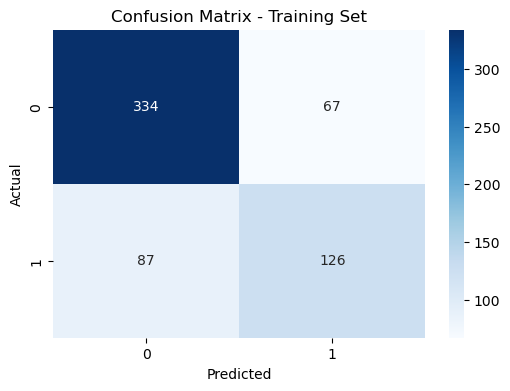

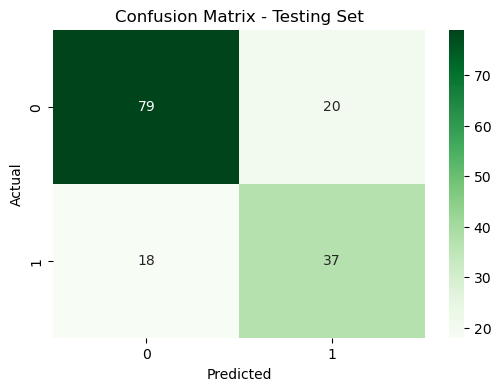

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión para el conjunto de entrenamiento
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Matriz de confusión para el conjunto de prueba
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#334 PREDIJO NO DIABETES CUANDO EFECTIVAMENTE NO LA HABIA
#67 DIJO QUE HABIA DIABETES CUANDO NO HABIA
#87 FALSOS NEGATIVOS, NO HABIA DIABETES CUANDO SI HABIA
#126 DETECTO DIABETES CORRECTAMENTE

#IN THIS CASE WE NEED TO FOCUS ON THE YES DIABETES AND NO DETECTION 126 TRAINING AND 37 IN TEST SET


### Exploring Log Probabilities in Naïve Bayes

Naive Bayes calculates log probabilities (logprobs) for each class to make predictions. Let's use `predict_log_proba` to calculate the log probabilities for each class (diabetes vs. no diabetes) for a few samples in the test set.

Question: For a given instance in the test set, calculate the log probabilities for each class (diabetes vs. no diabetes) and interpret the values. How does Naive Bayes decide the predicted class based on these log probabilities?

In [53]:
# Select a few samples from the test set
sample_indices = [0, 1, 12]  # Change these indices as desired
X_sample = X_test.iloc[sample_indices]

# Calculate log probabilities for each class
log_probs = model.predict_log_proba(X_sample)

# Display results
for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Predicted Class: {model.predict(X_sample.iloc[[i]])[0]}")
    print()

Sample 0 - Log Probabilities:
No Diabetes (0): -0.2256, Diabetes (1): -1.5998
Predicted Class: 0

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0776, Diabetes (1): -2.5942
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.9719, Diabetes (1): -0.4754
Predicted Class: 1



- Interpretation of Log Probabilities: Log probabilities represent the logarithm of the probability for each class. A higher log probability (closer to zero, since log values are negative) indicates a higher likelihood for that class.
- Decision-Making: The model predicts the class with the highest log probability. If the log probability for Diabetes (1) is higher (closer to zero) than for No Diabetes (0), the model will predict Diabetes (1).

Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

In [54]:
# your code here
# Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

log_probs = model.predict_log_proba(X_sample)

probs = np.exp(log_probs)
print(probs)

[[0.79805667 0.20194333]
 [0.92529092 0.07470908]
 [0.37835708 0.62164292]]


Change your decision treshold so that either class 1 or 0 becomes more frequent in order to optimize your preferred metric (precision or recall) for this problem. Try multiple tresholds until you are satisfied with your choice.

In [56]:
treshold = 0.5 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = model.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()

,index,no_diab_prob,diab_prob,prediction
0,668,0.798057,0.798057,0
1,324,0.925291,0.925291,0
2,624,0.974861,0.974861,0
3,690,0.803488,0.803488,0
4,473,0.375673,0.375673,1


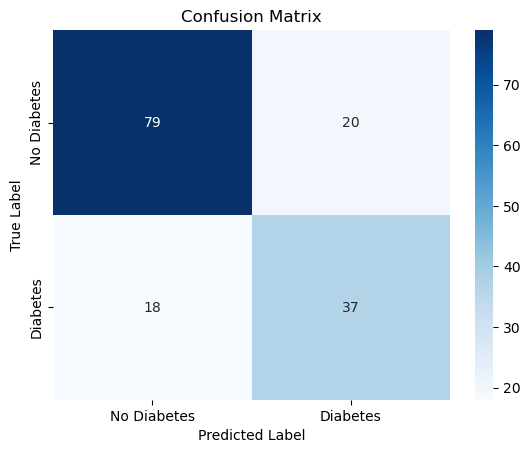

In [57]:
# create the confusion matrix for the adjusted problem
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()